# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [3]:
def apply_svd_custom(X_train, X_test, n_components):
    U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)
    
    # Step 2: Keep only the top n_components singular values
    U_train_reduced = U_train[:, :n_components]
    S_train_reduced = np.diag(S_train[:n_components])
    Vt_train_reduced = Vt_train[:n_components, :]
    
    # Reconstruct the dimensionally reduced training data
    X_train_reduced = np.dot(U_train_reduced, S_train_reduced)
    
    # Step 3: Reduce the test data using the same singular vectors from training data
    X_test_reduced = np.dot(X_test, Vt_train_reduced.T)
    
    return X_train_reduced, X_test_reduced

# Example usage:
n_components = 50  # You can experiment with different values
X_train_reduced, X_test_reduced = apply_svd_custom(X_train, X_test, n_components)

print("Shape of original X_train:", X_train.shape)
print("Shape of reduced X_train:", X_train_reduced.shape)
print("Shape of original X_test:", X_test.shape)
print("Shape of reduced X_test:", X_test_reduced.shape)

Shape of original X_train: (56000, 784)
Shape of reduced X_train: (56000, 50)
Shape of original X_test: (14000, 784)
Shape of reduced X_test: (14000, 50)


## Part 3: Train Logistic Regression and Measure Performance

In [5]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [14]:
svd_components = [784, 500, 300, 100, 50, 20]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...
SVD components: 784, Accuracy: 0.9209, Training time: 873.6450 seconds
Applying custom SVD with 500 components...
SVD components: 500, Accuracy: 0.9205, Training time: 592.2825 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.9205, Training time: 269.2073 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 56.8349 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9085, Training time: 15.9033 seconds
Applying custom SVD with 20 components...
SVD components: 20, Accuracy: 0.8779, Training time: 1.5992 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


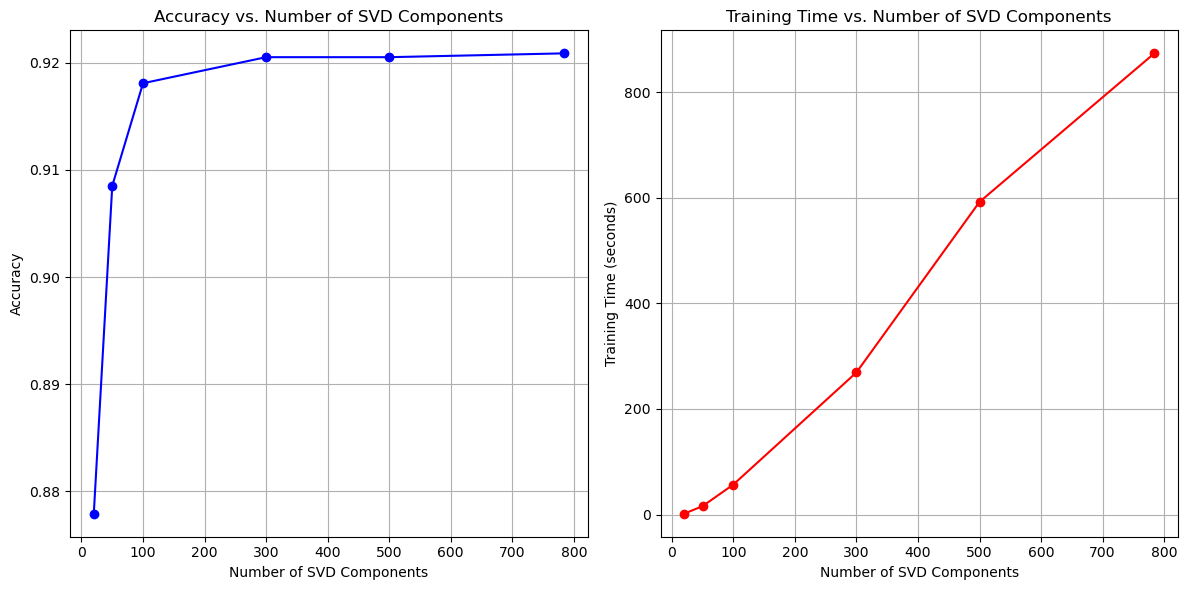

Top 5 Singular Vectors (reshaped to 28x28 images):


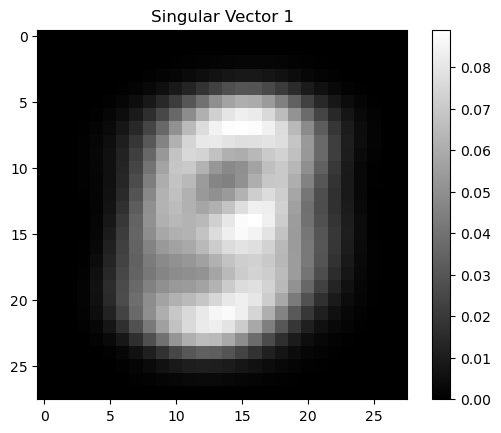

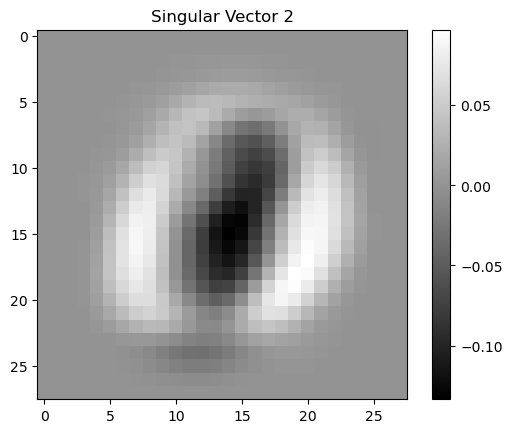

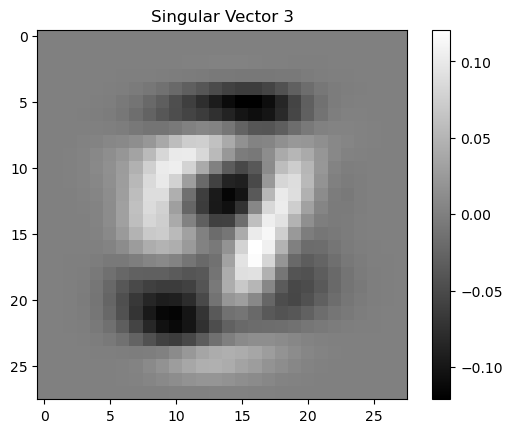

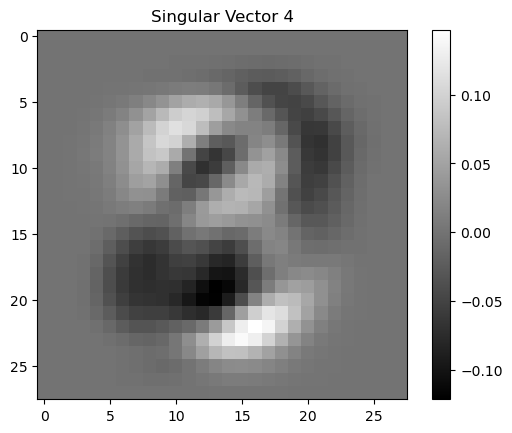

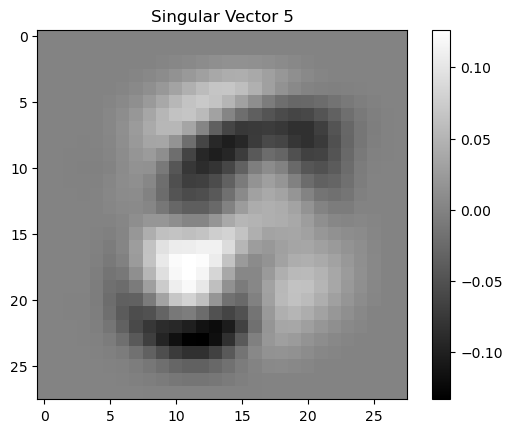

In [16]:
import matplotlib.pyplot as plt

# Extract the number of components, accuracy, and training time from the results
n_components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]

# Create a figure with two subplots: one for accuracy and one for training time
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(n_components, accuracies, marker='o', color='blue')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot Training Time
plt.subplot(1, 2, 2)
plt.plot(n_components, training_times, marker='o', color='red')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

print("Top 5 Singular Vectors (reshaped to 28x28 images):")

# Ensure that the singular vectors are stored in the Vt matrix from the SVD of training data
U_train, S_train, Vt_train = np.linalg.svd(X_train, full_matrices=False)

for i in range(5):
    singular_vector = Vt_train[i].reshape(28, 28)  # Reshape to 28x28
    plt.imshow(singular_vector, cmap='gray')
    plt.title(f'Singular Vector {i+1}')
    plt.colorbar()
    plt.show()


## Part 6: Analyze / Conclusion 

YOUR ANSWER: As the number of SVD components increases, the accuracy quickly improves. Beyond 300 components, there is little to no improvement in accuracy. This suggests that most of the important information for classification is captured within the first 100–300 components.
As the number of SVD components increases, training time increases substantially in a near-linear fashion.
The top singular vectors capture essential features of the data, such as prominent edges and shapes common to multiple digits. As the progress through the singular vectors, the patterns become less distinctive, highlighting that the later components capture finer, less critical details.